In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
import nltk
import json

import tensorflow as tf

from functions import sample_mean
from lists import stop_words,noise
from plots import model_plots
import string
import warnings
import os
os.chdir('/home/ubuntu/Notebooks/capstone/')

%matplotlib inline
punctuation = set(string.punctuation)
sws = stop_words().get_sws()
noise = noise().get_noise()
keras = tf.keras
pd.options.display.max_rows = 200

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

listings = pd.read_pickle('~/Notebooks/data/listings.pickle')
# reviews = pd.read_pickle('~/Desktop/g.school/data/reviews.pickle')
hotels = pd.read_pickle('data/hotels.pickle')

hotels = pd.read_pickle('data/hotels.pickle')
hotels = hotels.drop('reviews.id',axis=1)[hotels['language']=='en']
hotels['reviews.rating'] = hotels['reviews.rating'].replace(1.0,2.0).replace(0.0,2.0)

32288


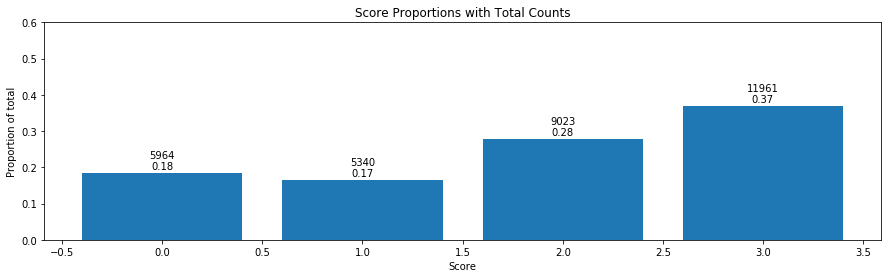

In [94]:
text_sample_pct = 3/3
np.random.seed(8)

# bad_examples = hotels.iloc[noise][['reviews.text','reviews.rating']]
hotel_text = hotels[['reviews.rating','reviews.text']]
hotel_text = hotel_text.reset_index().drop('index',axis=1)

hotel_text.at[18912,'reviews.rating'] = 3
hotel_text.at[29692,'reviews.rating'] = 2
hotel_text.at[7692,'reviews.rating'] = 2
hotel_text.at[24320,'reviews.rating'] = 2
hotel_text.at[8792,'reviews.rating'] = 5
hotel_text.at[18932,'reviews.rating'] = 2
hotel_text.at[26350,'reviews.rating'] = 5

hotel_text.at[32236,'reviews.rating'] = 5
hotel_text.at[26129,'reviews.rating'] = 5
hotel_text.at[26189,'reviews.rating'] = 5
hotel_text.at[7660,'reviews.rating'] = 5
hotel_text.at[18724,'reviews.rating'] = 2
hotel_text.at[7222,'reviews.rating'] = 2
hotel_text.at[18995,'reviews.rating'] = 5
hotel_text.at[25296,'reviews.rating'] = 5



hotel_text.at[28442,'reviews.rating'] = 2
hotel_text.at[14943,'reviews.rating'] = 5
hotel_text.at[8245,'reviews.rating'] = 2
hotel_text.at[26237,'reviews.rating'] = 3
hotel_text.at[16875,'reviews.rating'] = 2
hotel_text.at[23588,'reviews.rating'] = 5
hotel_text.at[29937,'reviews.rating'] = 3
hotel_text.at[1285,'reviews.rating'] = 2
hotel_text.at[29573,'reviews.rating'] = 2
hotel_text.at[29273,'reviews.rating'] = 5
hotel_text.at[8550,'reviews.rating'] = 5
hotel_text.at[8652,'reviews.rating'] = 5
hotel_text.at[1213,'reviews.rating'] = 3





hotel_text.at[30685,'reviews.rating'] = 5
hotel_text.at[28670,'reviews.rating'] = 3
hotel_text.at[14548,'reviews.rating'] = 3
hotel_text.at[32029,'reviews.rating'] = 3
hotel_text.at[11428,'reviews.rating'] = 2
hotel_text.at[16913,'reviews.rating'] = 5
hotel_text.at[23588,'reviews.rating'] = 5

hotel_text.at[30685,'reviews.rating'] = 5
hotel_text.at[28670,'reviews.rating'] = 3
hotel_text.at[14548,'reviews.rating'] = 3
hotel_text.at[32029,'reviews.rating'] = 3
hotel_text.at[11428,'reviews.rating'] = 2
hotel_text.at[16913,'reviews.rating'] = 5
hotel_text.at[16937,'reviews.rating'] = 2
hotel_text.at[21459,'reviews.rating'] = 5
hotel_text.at[32214,'reviews.rating'] = 5
hotel_text.at[29777,'reviews.rating'] = 2
hotel_text.at[24180,'reviews.rating'] = 2
hotel_text.at[19261,'reviews.rating'] = 5
hotel_text.at[18589,'reviews.rating'] = 5
hotel_text.at[3343,'reviews.rating'] = 2
hotel_text.at[26033,'reviews.rating'] = 5
hotel_text.at[29863,'reviews.rating'] = 3
hotel_text.at[30099,'reviews.rating'] = 5
hotel_text.at[11435,'reviews.rating'] = 3
hotel_text.at[18257,'reviews.rating'] = 5
hotel_text.at[19260,'reviews.rating'] = 5
hotel_text.at[8553,'reviews.rating'] = 5
hotel_text.at[17376,'reviews.rating'] = 5

hotel_text.at[11634,'reviews.rating'] = 5
hotel_text.at[11306,'reviews.rating'] = 5
hotel_text.at[18948,'reviews.rating'] = 3
hotel_text.at[9811,'reviews.rating'] = 5
hotel_text.at[9891,'reviews.rating'] = 5
hotel_text.at[25934,'reviews.rating'] = 5
hotel_text.at[16651,'reviews.rating'] = 3
hotel_text.at[24702,'reviews.rating'] = 2
hotel_text.at[26114,'reviews.rating'] = 5
hotel_text.at[18532,'reviews.rating'] = 2
hotel_text.at[30049,'reviews.rating'] = 5
hotel_text.at[7238,'reviews.rating'] = 2
hotel_text.at[14448,'reviews.rating'] = 3
hotel_text.at[18795,'reviews.rating'] = 3
hotel_text.at[3435,'reviews.rating'] = 5
hotel_text.at[7882,'reviews.rating'] = 2
hotel_text.at[24577,'reviews.rating'] = 2
hotel_text.at[6386,'reviews.rating'] = 2

plt.figure(figsize=(15,4))
hotel_text['reviews.rating'] = hotel_text['reviews.rating'].astype(int).replace(0,1)
hotel_text['reviews.text'] = [' '.join([word.lower() for word in sent.split()\
                                        if word not in punctuation]) for sent in hotel_text['reviews.text']]
score_counts = hotel_text['reviews.rating'].value_counts().sort_index()
review_distribution = score_counts/score_counts.sum()

plt.bar(range(review_distribution.shape[0]),review_distribution.sort_index().values)
for i,v in enumerate(review_distribution.sort_index().values):
    plt.text(i,v+.01,round(v,2),horizontalalignment='center')
    plt.text(i,v+.04,score_counts.iloc[i],horizontalalignment='center')
plt.title('Score Proportions with Total Counts')
plt.xlabel('Score')
plt.ylabel('Proportion of total')

plt.ylim(0,.6)
print(hotel_text.shape[0])
pd.set_option('max_colwidth', 200)

In [95]:
reviews = pd.read_pickle('~/Notebooks/data/reviews.pickle').drop_duplicates()
reviews = reviews[(~reviews['comments'].isna())]
listings = pd.read_pickle('~/Notebooks/data/listings.pickle')
index_mask = listings['summary'].dropna().index.unique()
listings = listings.loc[index_mask][listings['country_code']=='US'].drop_duplicates()
unique_listings = listings.groupby('id')[['review_scores_rating']].\
                                    agg('min').dropna().sample(frac=(1/8),random_state=3)
unique_listings['score'] = unique_listings['review_scores_rating'].\
                                    div(20).round().replace(0,1)

new_reviews = reviews.copy()
new_reviews = new_reviews.join(unique_listings['score'],how='inner').reset_index().set_index('id')
new_reviews[['index','listing_id', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'score']]
new_reviews = new_reviews.loc[~new_reviews.index.duplicated(keep='first')]
new_reviews['comments'] = [' '.join([word.lower() for word in sent.split()\
                                         if word not in punctuation]) for sent in new_reviews['comments']]

hotel_X = hotel_text[['reviews.text']]
hotel_X['train_test'] = 'Train'
hotel_X.columns = ['review','train_test']
abnb_X = new_reviews[['comments']]
abnb_X['train_test']= 'Test'
abnb_X.columns = ['review','train_test']
df_X = pd.concat([abnb_X,hotel_X],axis=0,ignore_index=False).reset_index()


Training Accuracy 0.67
mnb Accuracy 0.577
mnb Distribution Accuracy 0.859
mnb Error Accuracy 0.904


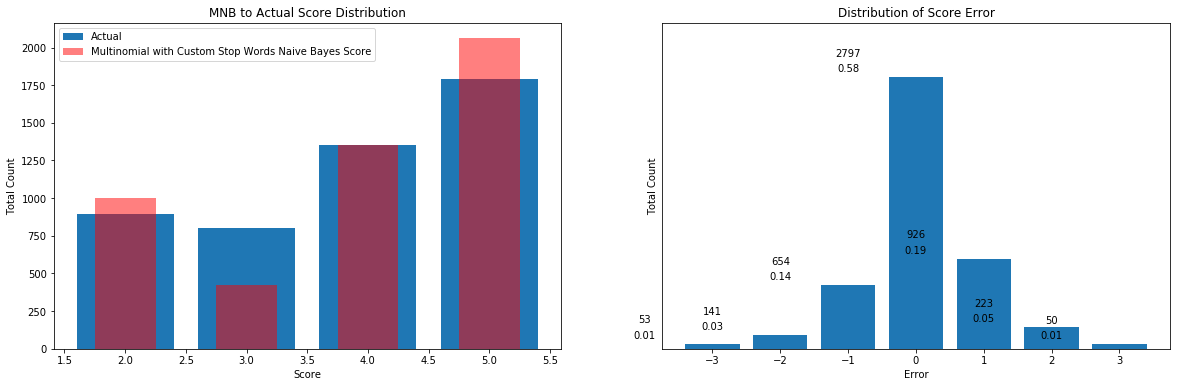

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
nb = MultinomialNB()


X = df_X['review']
X_metrics = hotel_text['reviews.text']
y = hotel_text['reviews.rating']

X_char_count = X_metrics.apply(len)
X_word_count = X_metrics.apply(lambda x: len(x.split()))
X_word_density = X_char_count/X_word_count
X_punctuation_count = X_metrics.apply(lambda x: len([_ for _ in x if _ in set(string.punctuation)]))
X_title_word_count = X_metrics.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_uppercase_count = X_metrics.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))



count = CountVectorizer(stop_words=sws,ngram_range=(1,1))
tfidf = TfidfVectorizer(stop_words=sws)
X = count.fit_transform(X).toarray()[df_X[df_X['train_test']=='Train'].index]

X = np.c_[X,X_char_count,
                       X_word_count,
                       X_word_density,
                       X_punctuation_count,
                       X_title_word_count,
                       X_uppercase_count]

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.15)

nb.fit(x_train,y_train)
ypred = pd.Series(nb.predict(x_test),index=y_test.index)
ypred_train = nb.predict(x_train)
# print('Test: ',(ypred - y_test).value_counts().max()/(ypred - y_test).value_counts().sum())
# print('Train: ',(ypred_test - y_train).value_counts().max()/(ypred_test - y_train).value_counts().sum())
mnb_plots = model_plots()


mnb_plots.model_to_actual_plot(hotel_text,
                              y_test,
                              ypred,
                              'Actual',
                              'Multinomial with Custom Stop Words Naive Bayes Score',
                              'MNB to Actual Score Distribution')
mnb_plots.error_plot(hotel_text,ypred,y_test,'Error','total count')

accuracy_mnb = (ypred == y_test).mean().round(3)
distribution_error_mnb = (ypred.sub(y_test).abs().sum()/y_test.sum()).round(3)
error_accuracy_mnb = ((y_test.sub(ypred)).lt(2) & (y_test.sub(ypred)).gt(-2)).mean().round(3)
training_accuracy_mnb = round((ypred_train - y_train).value_counts().max()/(ypred_train - y_train).value_counts().sum(),2)

print('Training Accuracy',training_accuracy_mnb)
print('mnb Accuracy',accuracy_mnb)
print('mnb Distribution Accuracy',1-distribution_error_mnb)
print('mnb Error Accuracy',error_accuracy_mnb.round(3))

In [97]:
nb.predict_proba(x_test)[:5]

array([[3.29961959e-06, 1.02446494e-02, 9.14399855e-01, 7.53521956e-02],
       [1.03744466e-03, 1.86162782e-02, 2.76458731e-01, 7.03887546e-01],
       [2.71116113e-01, 2.57886300e-01, 2.92500194e-01, 1.78497392e-01],
       [9.63822558e-02, 1.91300043e-01, 5.85557591e-01, 1.26760111e-01],
       [9.44344448e-01, 4.81644456e-02, 7.38398855e-03, 1.07117985e-04]])

In [98]:
nb.predict(x_test)[:5]

array([4, 5, 4, 4, 2])

svdlr Training Accuracy 0.6
svdlr Accuracy 0.578
svdlr Distribution Accuracy 0.856
svdlr Error Accuracy 0.9


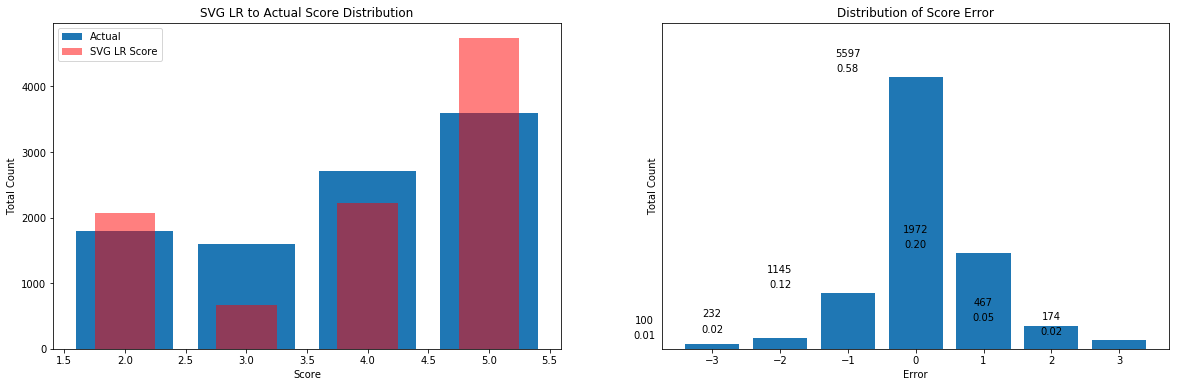

In [99]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression


X = hotel_text['reviews.text']
y = hotel_text['reviews.rating']

count = CountVectorizer(stop_words=sws)
tfidf = TfidfVectorizer(stop_words=sws)
# X = tfidf.fit_transform(X).toarray()
X = tfidf.fit_transform(X).toarray()




svd = TruncatedSVD(n_components=400,random_state=0,n_iter=1)
svd_topics_vectors = svd.fit_transform(X)
# X = np.c_[svd_topics_vectors,hotel_text['word_count']]
#X = StandardScaler().fit_transform(svd_topics_vectors)


x_train,x_test,y_train,y_test = train_test_split(svd_topics_vectors,y,stratify=y,test_size=.30)


lr = LogisticRegression(random_state=3)
lr.fit(x_train,y_train)

ypred = pd.Series(lr.predict(x_test),index=y_test.index)
ypred_train = lr.predict(x_train)
# print('Test: ',(ypred - y_test).value_counts().max()/(ypred - y_test).value_counts().sum())
# print('Train: ',(ypred_test - y_train).value_counts().max()/(ypred_test - y_train).value_counts().sum())
lr_plots = model_plots()


lr_plots.model_to_actual_plot(hotel_text,
                              y_test,
                              ypred,
                              'Actual',
                              'SVG LR Score',
                              'SVG LR to Actual Score Distribution')
lr_plots.error_plot(hotel_text,ypred,y_test,'Error','total count')

accuracy_svdlr = (ypred == y_test).mean().round(3)
distribution_error_svdlr = (ypred.sub(y_test).abs().sum()/y_test.sum()).round(3)
error_accuracy_svdlr = ((y_test.sub(ypred)).lt(2) & (y_test.sub(ypred)).gt(-2)).mean().round(3)
training_accuracy_svdlr = round((ypred_train - y_train).value_counts().max()/(ypred_train - y_train).value_counts().sum(),2)

print('svdlr Training Accuracy',training_accuracy_svdlr)
print('svdlr Accuracy',accuracy_svdlr)
print('svdlr Distribution Accuracy',1-distribution_error_svdlr)
print('svdlr Error Accuracy',error_accuracy_svdlr.round(3))

# WORD EMBEDDING PREP

In [100]:
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin.gz',
                                                 binary=True,
                                                 limit=2000000)

In [101]:
word_vectors.doesnt_match(['Germany','Europe','Kitchen'])

'Kitchen'

In [102]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer


X = hotel_text['reviews.text']
y = hotel_text['reviews.rating']
x_train,x_valid,y_train,y_valid = train_test_split(X,y,test_size=.15)

In [103]:
##### Sentence Metrics
X_char_count = X.apply(len)
X_word_count = X.apply(lambda x: len(x.split()))
X_word_density = X_char_count/X_word_count
X_punctuation_count = X.apply(lambda x: len([_ for _ in x if _ in set(string.punctuation)]))
X_title_word_count = X.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_uppercase_count = X.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [104]:
# wiki_news_vec_file = open('../data/wiki-news-300d-1M.vec')

In [105]:
def embedding_matrix(sequences,embedding_length):
    embedding_mat = np.zeros((sequences.shape[0],sequences.shape[1],embedding_length))
    zero_vector = np.zeros((300,))
    for i,seq in enumerate(sequences):
        for idx,num in enumerate(seq):
            try:
                embedding_mat[i][idx] = word_vectors.get_vector(reverse_word_index[num])
            except:
                embedding_mat[i][idx] = zero_vector

    return embedding_mat

In [106]:
maxlen = 50
training_samples = x_train.shape[0]
validation_samples = x_valid.shape[0]
batch_size = 25
embedding_dims = 300
epochs = 2
embedding_dim = 300

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk

token = Tokenizer(char_level=False,lower=True)
token.fit_on_texts(X)
# tokenize.texts_to_sequences(x_train.iloc[0])
x_train_seq = pad_sequences(token.texts_to_sequences(x_train),maxlen=maxlen)
x_valid_seq = pad_sequences(token.texts_to_sequences(x_valid),maxlen=maxlen)

word_index = token.word_index

In [107]:
embedding_matrix = np.zeros((max_words,embedding_dims))
for word,i in word_index.items():
    if i < max_words:
        try:
            embedding_vector = word_vectors.get_vector(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
        except:
            pass


In [108]:
ohe = OneHotEncoder()
y_train_new = ohe.fit_transform(y_train.values.reshape(-1,1))
y_valid_new = ohe.fit_transform(y_valid.values.reshape(-1,1))

x_valid_seq2 = x_valid_seq.reshape(x_valid_seq.shape[0],x_valid_seq.shape[1],1)
x_train_seq2 = x_train_seq.reshape(x_train_seq.shape[0],x_train_seq.shape[1],1)

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, Embedding

model2 = Sequential()
model2.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model2.add(Dropout(rate=.1))
model2.add(LSTM(batch_size,return_sequences=False))
model2.add(Dense(4,activation='sigmoid'))
model2.layers[0].set_weights([embedding_matrix])
# model.layers[0].trainable = False

In [111]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',metrics=['acc'])
history = model2.fit(x_train_seq,y_train_new.toarray(),epochs=epochs,
                     batch_size=batch_size,
                     validation_data=(x_valid_seq,
                                      y_valid_new))

Train on 27444 samples, validate on 4844 samples
Epoch 1/2
27444/27444 [==============================] - 85s 3ms/step - loss: 1.0474 - acc: 0.5315 - val_loss: 0.9900 - val_acc: 0.5659
Epoch 2/2
27444/27444 [==============================] - 84s 3ms/step - loss: 0.8776 - acc: 0.6183 - val_loss: 0.9574 - val_acc: 0.5803


In [118]:

model2.pred(x_valid_seq[:5])

array([2, 2, 3, 2, 3])

In [138]:
model2.save('first_model.h5')

In [131]:
x_valid_seq[0]
padding = x_valid_seq[0].copy()
padding[:] = 0


In [137]:
np.vstack([x_valid_seq[0],padding])

array([[  89,   73,  182,    1,  116,    5,   29,    9, 1274,   32,    3,
        1007,    2,  835,  523,   20,  768,  407,   21,  130,    6,  650,
           1,   67,   63,   14,  224,  110,   58,    4,  225,  130,   41,
          47,  319,    5, 1181,    6,   13,   10,    1,   90,    8,  337,
           7,   41,   19,   23,   57,   61],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)